# Customer Segmentation Using K-Means Clustering

## Introduction
This project leverages K-Means clustering to segment customers based on purchasing behavior, enabling actionable insights for targeted marketing and improved customer engagement. Dimensionality reduction techniques such as PCA are utilized to streamline the dataset while preserving critical variance.

---

### Authors:
- **Yoensuk (Jason)**
- **Shrinidhi**
- **Tharun**
- **Jack**



In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

# Load data
df = pd.read_csv("C:/Users/Admin/Downloads/data (1).csv", encoding="ISO-8859-1")

# Data Cleaning-1

In [12]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [13]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


Missing values in 'Description' and 'CustomerID'

### Missing Values


In [14]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

# Verifying the removal of missing values
df.isnull().sum().sum()


0

### Data Duplicates

In [15]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Total number of duplicate rows
total_duplicates = len(duplicate_rows)
total_duplicates

# Displaying the first 10 records
#duplicate_rows_sorted.head(10)

10062

In [16]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

# Getting the number of rows in the dataframe
df.shape[0]

401604

### Stock code anomalies

In [17]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The dataset contains {unique_stock_codes} unique stock codes, indicating a substantial variety of products available in the online retail store")

# Finding the top 10 most frequent stock codes
df['StockCode'].value_counts(normalize=True).head(10) * 100

print(f"There are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products.")

The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store
There are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products.


In [18]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

print(f"Stock codes that contain 0 or 1 numeric characters are SUSPICIOUS")

# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64
Stock codes that contain 0 or 1 numeric characters are SUSPICIOUS
Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [19]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

# Getting the number of rows in the dataframe
df.shape[0]

399689

### Product Description check

In [20]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]
top_30_descriptions

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
WOODEN PICTURE FRAME WHITE FINISH      900
JUMBO BAG PINK POLKADOT                897
SET OF 4 PANTRY JELLY MOULDS           890

All description contain upper cases = certain rule?
Let's check the descriptions with lower cases

In [21]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


Reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "Next Day Carriage" and "High Resolution Image". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

In [22]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [23]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

### Zero Unit Price

In [24]:
df['UnitPrice'].describe()

print(f"There are some transactions where the unit price is zero, potentially indicating a free item or a data entry error (min = 0)")

df[df['UnitPrice']==0].describe()[['Quantity']]

print(f"There are 33 transactions with zero unit price")

There are some transactions where the unit price is zero, potentially indicating a free item or a data entry error (min = 0)
There are 33 transactions with zero unit price


In [25]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

df.shape[0]

399573

# Feature Engineering

### Day since last purchase

In [26]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


### Transactions cancellation frequency & rate

In [27]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

The percentage of cancelled transactions in the dataset is: 2.13%


C:\Users\Admin\AppData\Local\Temp\ipykernel_21488\3188807894.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,1.0,0.5
1,12347.0,2,0.0,0.0
2,12348.0,75,0.0,0.0
3,12349.0,18,0.0,0.0
4,12350.0,310,0.0,0.0


### Total transactions & Total product purchased

In [28]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased
0,12346.0,325,1.0,0.5,2,0
1,12347.0,2,0.0,0.0,7,2458
2,12348.0,75,0.0,0.0,4,2332
3,12349.0,18,0.0,0.0,1,630
4,12350.0,310,0.0,0.0,1,196


### Unique Products Purchased

In [29]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased
0,12346.0,325,1.0,0.5,2,0,1
1,12347.0,2,0.0,0.0,7,2458,103
2,12348.0,75,0.0,0.0,4,2332,21
3,12349.0,18,0.0,0.0,1,630,72
4,12350.0,310,0.0,0.0,1,196,16


### Total spend & Avg transaction value

In [30]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,1.0,0.5,2,0,1,0.00,0.000000
1,12347.0,2,0.0,0.0,7,2458,103,4310.00,615.714286
2,12348.0,75,0.0,0.0,4,2332,21,1437.24,359.310000
3,12349.0,18,0.0,0.0,1,630,72,1457.55,1457.550000
4,12350.0,310,0.0,0.0,1,196,16,294.40,294.400000


### Customer Behavior related

In [31]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21488\2052236717.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,1.0,0.5,2,0,1,0.00,0.000000,0.000000,1,10
1,12347.0,2,0.0,0.0,7,2458,103,4310.00,615.714286,2.016575,1,14
2,12348.0,75,0.0,0.0,4,2332,21,1437.24,359.310000,10.884615,3,19
3,12349.0,18,0.0,0.0,1,630,72,1457.55,1457.550000,0.000000,0,9
4,12350.0,310,0.0,0.0,1,196,16,294.40,294.400000,0.000000,2,16


### Country (UK)

In [32]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

In [33]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,1.0,0.5,2,0,1,0.00,0.000000,0.000000,1,10,1
1,12347.0,2,0.0,0.0,7,2458,103,4310.00,615.714286,2.016575,1,14,0
2,12348.0,75,0.0,0.0,4,2332,21,1437.24,359.310000,10.884615,3,19,0
3,12349.0,18,0.0,0.0,1,630,72,1457.55,1457.550000,0.000000,0,9,0
4,12350.0,310,0.0,0.0,1,196,16,294.40,294.400000,0.000000,2,16,0


### Trend related

In [34]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21488\154947174.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,1.0,0.5,2,0,1,0.00,0.000000,0.000000,1,10,1,0.000000,0.000000,0.000000
1,12347.0,2,0.0,0.0,7,2458,103,4310.00,615.714286,2.016575,1,14,0,615.714286,341.070789,4.486071
2,12348.0,75,0.0,0.0,4,2332,21,1437.24,359.310000,10.884615,3,19,0,359.310000,203.875689,-100.884000
3,12349.0,18,0.0,0.0,1,630,72,1457.55,1457.550000,0.000000,0,9,0,1457.550000,0.000000,0.000000
4,12350.0,310,0.0,0.0,1,196,16,294.40,294.400000,0.000000,2,16,0,294.400000,0.000000,0.000000


In [35]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Cancellation_Frequency          4282 non-null   Int64  
 3   Cancellation_Rate               4282 non-null   Float64
 4   Total_Transactions              4282 non-null   Int64  
 5   Total_Products_Purchased        4282 non-null   Int64  
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Total_Spend                     4282 non-null   Float64
 8   Average_Transaction_Value       4282 non-null   Float64
 9   Average_Days_Between_Purchases  4282 non-null   Float64
 10  Day_Of_Week                     4282 non-null   Int32  
 11  Hour                            4282 non-null   Int32  
 12  Is_UK                           42

# Data Cleaning 2

### Outlier Detenction (Isolation Forest)

In [37]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,1,0.5,2,0,1,0.0,0.0,0.0,1,10,1,0.0,0.0,0.0,1,0
1,12347.0,2,0,0.0,7,2458,103,4310.0,615.714286,2.016575,1,14,0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,0,0.0,4,2332,21,1437.24,359.31,10.884615,3,19,0,359.31,203.875689,-100.884,1,0
3,12349.0,18,0,0.0,1,630,72,1457.55,1457.55,0.0,0,9,0,1457.55,0.0,0.0,1,0
4,12350.0,310,0,0.0,1,196,16,294.4,294.4,0.0,2,16,0,294.4,0.0,0.0,1,0


In [38]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100
outlier_percentage

Is_Outlier
0    94.978982
1     5.021018
Name: proportion, dtype: float64

In [39]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

# Feature scailing 

In [40]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.353062,0.369344,2.374387,-0.478988,-0.784097,-0.906747,-0.820764,-1.327574,-0.304671,1,-1.084316,1,-1.340868,-0.718270,0.088032
1,12347.0,-0.901750,-0.527981,-0.594322,0.667865,2.083271,0.799743,2.357902,1.549375,-0.124399,1,0.652383,0,0.999734,1.280173,0.114720
2,12348.0,-0.166142,-0.527981,-0.594322,-0.020247,1.936286,-0.572141,0.239214,0.351316,0.668361,3,2.823256,0,0.025028,0.476303,-0.512125
3,12349.0,-0.740521,-0.527981,-0.594322,-0.708359,-0.049174,0.281103,0.254193,5.482886,-0.304671,0,-1.518490,0,4.199924,-0.718270,0.088032
4,12350.0,2.201910,-0.527981,-0.594322,-0.708359,-0.555454,-0.655793,-0.603641,0.048022,-0.304671,2,1.520732,0,-0.221723,-0.718270,0.088032


# Dimensionality Reduction

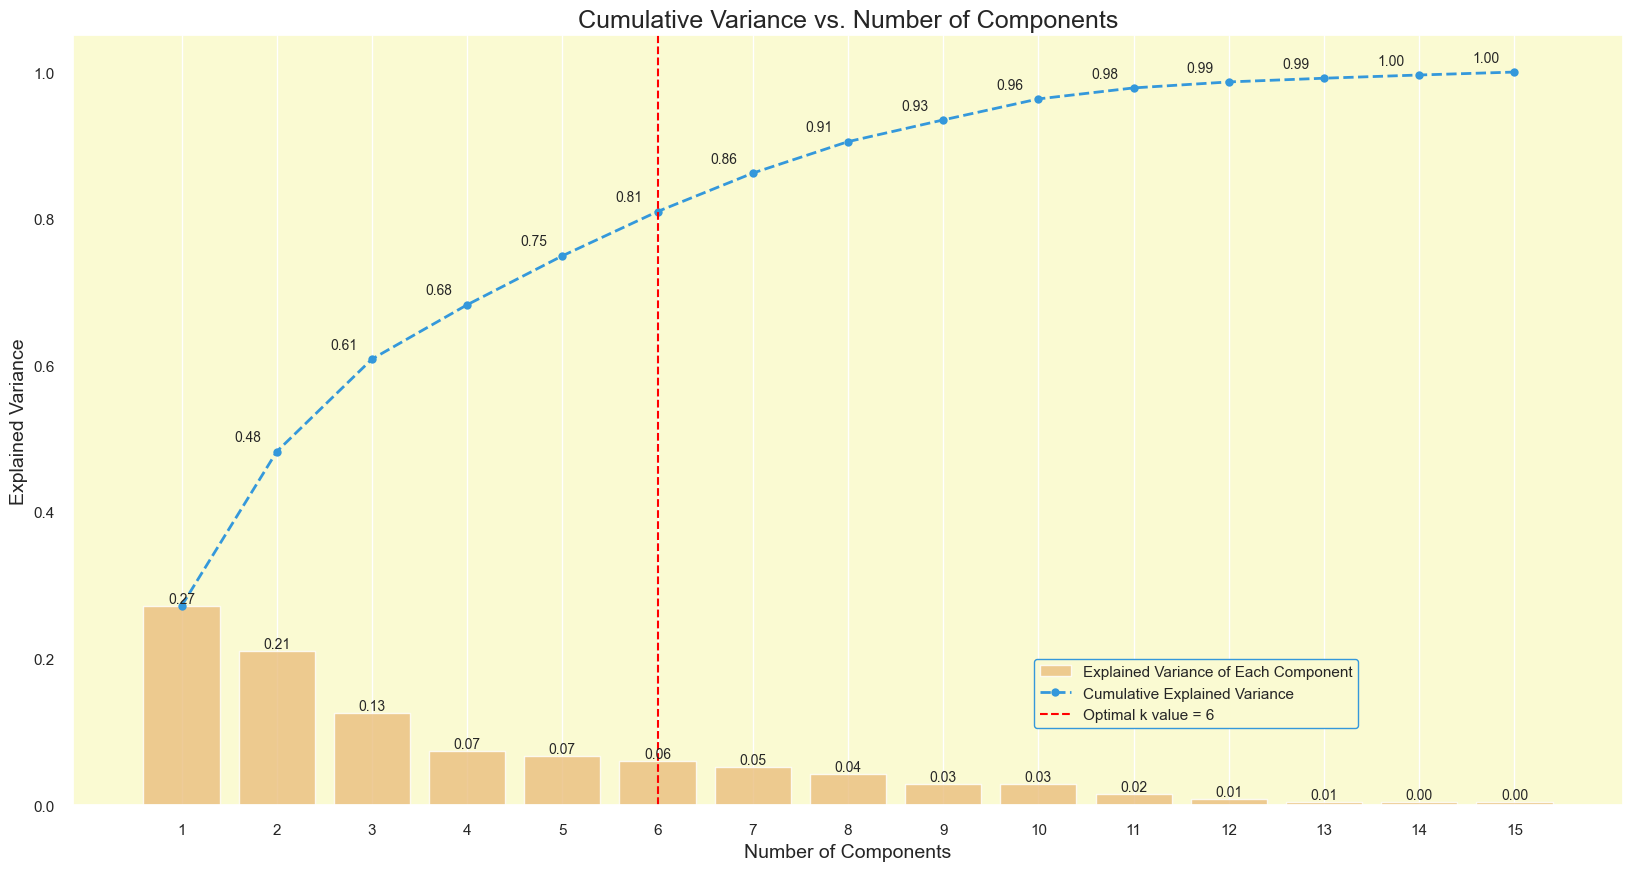

In [41]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fafad2'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#3498db', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#3498db')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

### Interpretation of Cumulative Variance Plot

### Key Observations:
- **Explained Variance**:
  - First 6 components explain ~96% of the total variance.
  - Subsequent components contribute minimal additional information.
  
- **Cumulative Variance**:
  - The curve flattens after 6 components, indicating diminishing returns.

### Conclusion:
- **Optimal Components**: 6 components are sufficient to capture most of the variance.
- **Action**: Use these 6 components for analysis to reduce dimensionality while preserving information.


In [42]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [43]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.155454,-1.640364,-2.426401,-1.568808,-0.640009,1.884780
12347.0,3.292044,-1.617819,1.962089,0.766158,-0.049943,-0.768500
12348.0,0.689567,0.540936,0.725258,0.646438,-0.543977,-2.279667
12349.0,1.651179,-2.830758,5.820986,-1.916116,0.601309,1.175792
12350.0,-2.053030,-0.387338,0.672922,-0.115069,-1.493949,-0.080021


In [44]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffffe0' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.221291,0.005296,0.043951,-0.289633,-0.259536,0.364473
Cancellation_Frequency,0.292213,-0.036832,-0.418239,-0.171285,-0.117942,0.176390
Cancellation_Rate,0.130707,-0.047501,-0.447505,-0.440920,-0.122229,0.142114
Total_Transactions,0.385593,-0.008125,-0.238193,0.207633,-0.004010,0.055933
Total_Products_Purchased,0.413073,-0.018765,0.063768,0.125338,0.042962,0.025339
Unique_Products_Purchased,0.332197,0.040203,0.019997,0.244794,-0.175653,-0.093102
Total_Spend,0.438354,-0.018293,0.059364,0.088667,0.023747,0.053367
Average_Transaction_Value,0.174637,-0.028445,0.570389,-0.239730,0.011776,0.057168
Average_Days_Between_Purchases,-0.023690,-0.039311,-0.112730,0.050623,0.755758,-0.233835
Day_Of_Week,0.041585,0.993479,-0.013339,-0.054587,0.062849,0.049403


# K means Clustering

### Optimal k - Elbow Method

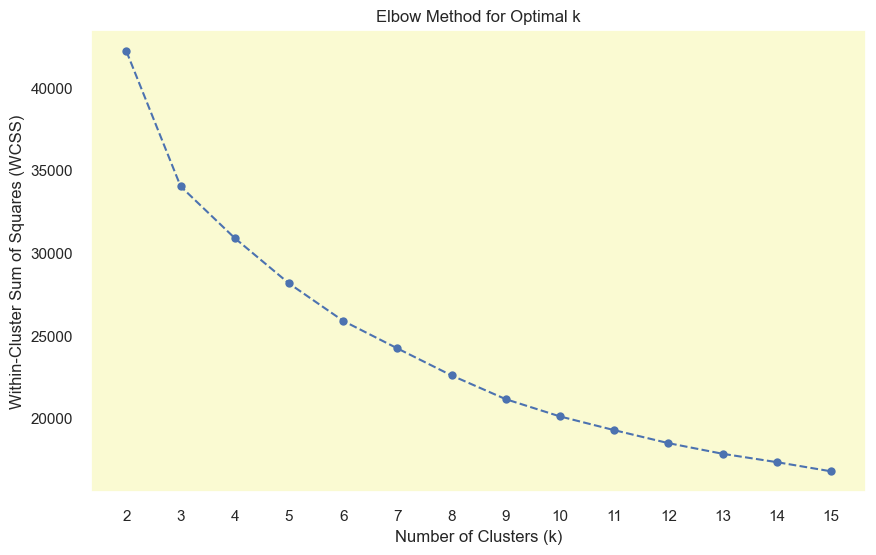

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of k values to test
k_values = range(2, 16)

# List to store WCSS for each k
wcss = []

# Fit KMeans for each k and calculate WCSS
for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(customer_data_pca)
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()


### Inference from the Elbow Plot

### 1. Elbow Point:
- The plot shows a sharp decline in **Within-Cluster Sum of Squares (WCSS)** for `k=2` to `k=4`.
- After **k=4**, the rate of decrease in WCSS diminishes significantly, indicating that adding more clusters provides diminishing returns in reducing variance.
- The **optimal number of clusters** appears to be around 'k=3' to 'k=4', where the "elbow" of the curve is located.

### 2. Trade-off Between Complexity and Interpretability:
- Clusters beyond `k=4` result in smaller reductions in WCSS, indicating that additional clusters do not significantly improve clustering quality.
- A simpler solution with fewer clusters (e.g., **k=3** or **k=4**) may provide a better balance between complexity and interpretability.

### 3. Possible Choices:
- **k=3**: Provides a simpler segmentation while still explaining most of the variance.
- **k=4**: Offers slightly more nuanced segmentation, potentially capturing finer patterns in the data.

### 4. Conclusion:
- The elbow plot suggests that **3 or 4 clusters** would be optimal for the dataset.
- Final decision can be based on:
  - **Silhouette Scores** for `k=3` and `k=4` to validate cluster separation.
  - **Cluster Profiles** to determine which segmentation is more interpretable and actionable for the business context.

---


## Silhouette Evaluation

In [47]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

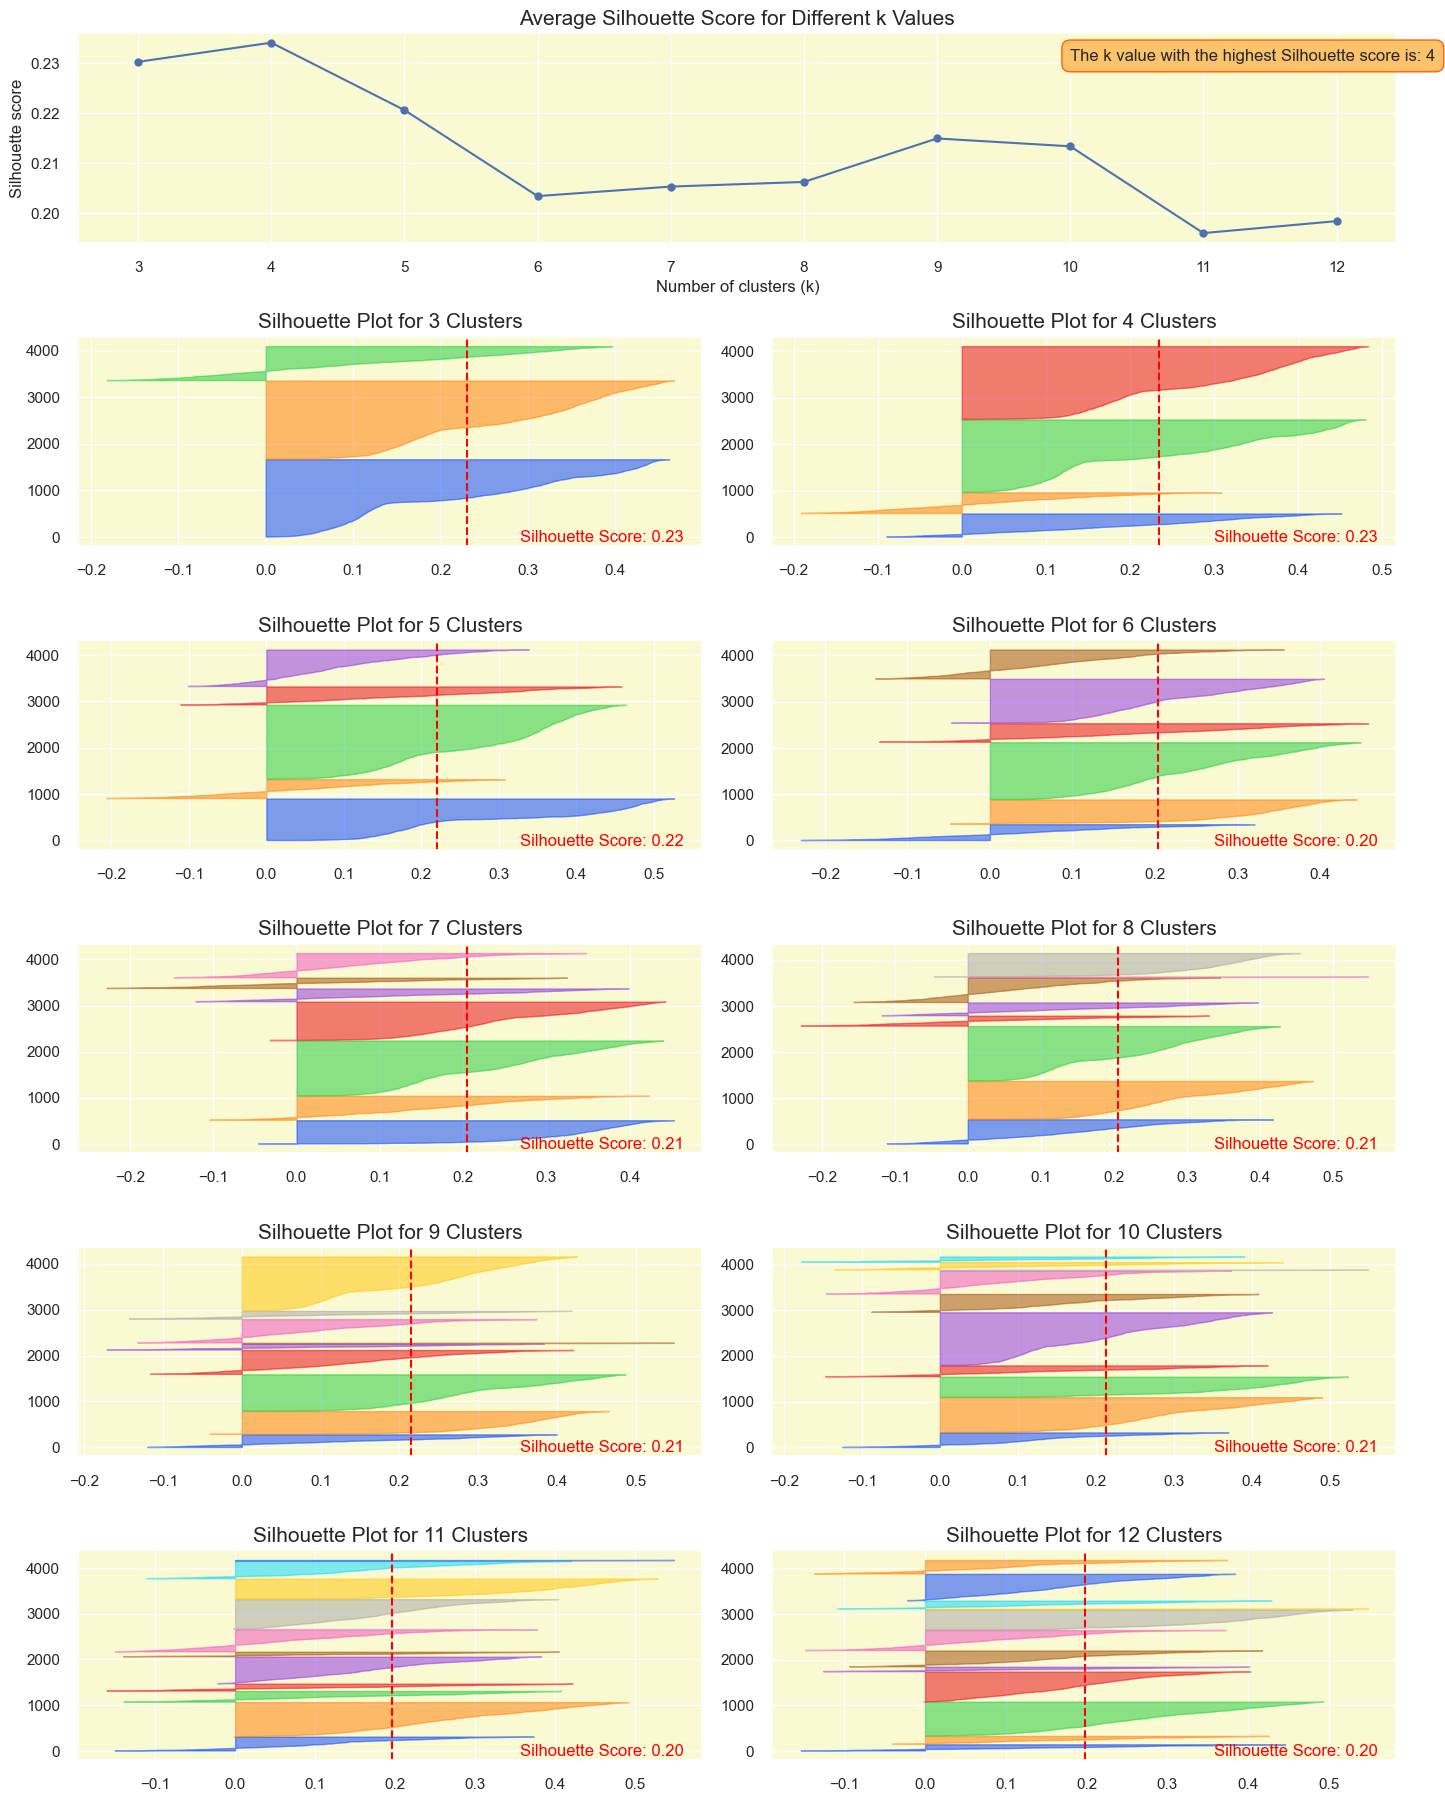

In [48]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(15, 30))

### Interpretation of Silhouette Analysis

### 1. Top Plot (Average Silhouette Scores)
- The plot shows the **average silhouette score** for different numbers of clusters (`k`).
- The **highest silhouette score (~0.23)** is observed at **k=4**, but **k=3** also has a comparable score (~0.23), making both valid candidates.
- Beyond `k=4`, the silhouette score decreases, indicating poorer cluster quality with additional clusters.

---

### `k=3`?

### 1. Cluster Quality at `k=3`
- The silhouette plot for `k=3` shows well-balanced clusters with minimal overlap.
- The average silhouette score (0.23) is high, indicating good cluster separation.

### 2. Simplicity and Actionability
- With only 3 clusters, segmentation is easier to interpret and apply (e.g., for customer profiling or marketing).
- Additional clusters (e.g., `k=4` or higher) increase complexity without significantly improving the silhouette score.

### 3. Silhouette Score Comparison
- **k=4**: Similar average silhouette score (~0.23), but uneven cluster sizes suggest reduced interpretability.
- **k=5 or higher**: Silhouette scores drop further, and some points have negative scores, indicating poor cluster assignments.

### 4. Avoiding Overfitting
- Increasing the number of clusters beyond `k=3` results in overly fine-grained segmentation, reducing practicality.

---

### Conclusion
- **`k=3` is chosen** because it provides a good balance between cluster quality, simplicity, and interpretability.
- While **`k=4`** is also a valid option, the added complexity may not yield significant benefits.

---


Optimal k=3 because:

1. A cluster with a high average silhouette score
2. Better cluster thickness

## Clustering

In [49]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [50]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Cancellation_Frequency,Cancellation_Rate,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,1,0.5,2,0,1,0.0,0.0,0.0,1,10,1,0.0,0.0,0.0,2
1,12347.0,2,0,0.0,7,2458,103,4310.0,615.714286,2.016575,1,14,0,615.714286,341.070789,4.486071,0
2,12348.0,75,0,0.0,4,2332,21,1437.24,359.31,10.884615,3,19,0,359.31,203.875689,-100.884,1
3,12349.0,18,0,0.0,1,630,72,1457.55,1457.55,0.0,0,9,0,1457.55,0.0,0.0,2
4,12350.0,310,0,0.0,1,196,16,294.4,294.4,0.0,2,16,0,294.4,0.0,0.0,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_21488\3969427647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = groupe

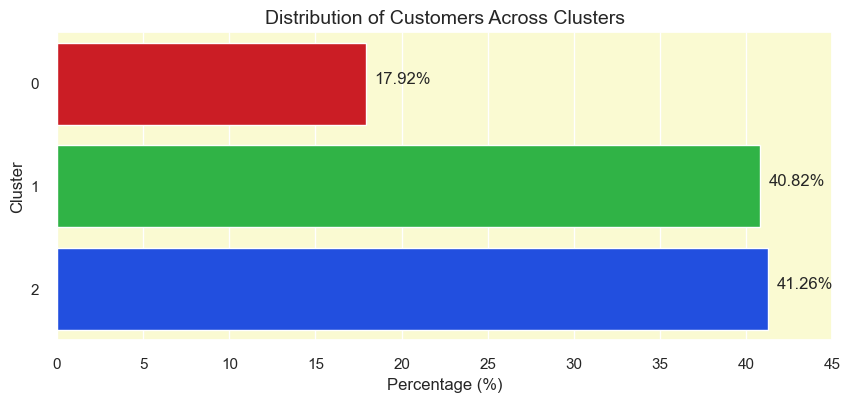

In [51]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

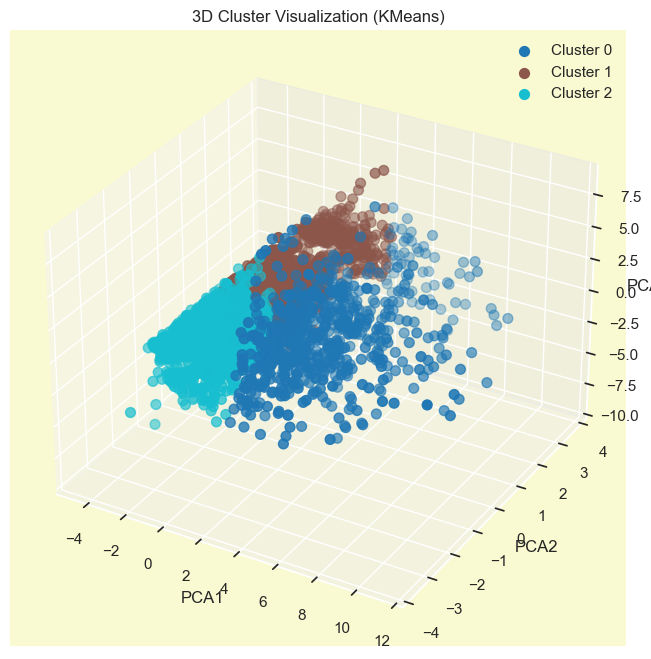

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Define a color map or manually specify colors
colors = plt.cm.tab10(np.linspace(0, 1, len(np.unique(new_labels))))  # Adjust colormap as needed

# Assuming customer_data_pca is a DataFrame with PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters with unique colors
for cluster_label, color in zip(np.unique(new_labels), colors):
    cluster_data = customer_data_pca[customer_data_pca['cluster'] == cluster_label]
    ax.scatter(
        cluster_data.iloc[:, 0],  # PCA1
        cluster_data.iloc[:, 1],  # PCA2
        cluster_data.iloc[:, 2],  # PCA3
        color=color,              # Assign color to each cluster
        label=f'Cluster {cluster_label}',
        s=50                      # Marker size
    )

# Labeling the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D Cluster Visualization (KMeans)')

# Add legend
ax.legend()
plt.show()

### Interpretation of Clusters

### 1. Distribution of Customers (Bar Chart)
- **Cluster 0**: 17.92% - Smallest group, possibly niche or less active customers.
- **Cluster 1**: 40.82% - Moderate-sized group, likely average shoppers.
- **Cluster 2**: 41.26% - Largest group, potentially frequent or highly engaged shoppers.

### 2. 3D Cluster Visualization (Scatter Plot)
- **Cluster 0 (Brown)**: Compact and distinct, smaller group.
- **Cluster 1 (Cyan)**: Spread out, diverse customer behavior.
- **Cluster 2 (Blue)**: Moderately compact, some overlap with Cluster 1.

### Insights
- Clusters are well-separated, confirming good segmentation.
- Cluster 0 may represent niche or unique behaviors, while Clusters 1 and 2 dominate the dataset.


# Clustering Evaluation

### Evaluation metrics

In [53]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23032821122629443 |
| Calinski Harabasz Score |  1216.779025434754  |
|  Davies Bouldin Score   | 1.4094083976604272  |
+-------------------------+---------------------+


### Cluster Evaluation Metrics Interpretation

### 1. Silhouette Score: **0.2303**
- **Range**: -1 to 1 (higher is better).
- **Interpretation**: A score of ~0.23 indicates a **fair level of separation** between clusters.
- **Insight**: While the clusters are reasonably well-defined, there may be some overlap or less distinct boundaries between them.

### 2. Calinski Harabasz Score: **1216.78**
- **Range**: No fixed range (higher is better).
- **Interpretation**: A high score indicates **compact clusters** that are well-separated from each other.
- **Insight**: The clusters are tightly packed and distinctly separated, validating the choice of `k=3`.

### 3. Davies-Bouldin Score: **1.41**
- **Range**: No fixed range (lower is better).
- **Interpretation**: A score of 1.41 suggests a **moderate level of similarity** between clusters.
- **Insight**: Clusters are reasonably distinct but not perfectly separated, which is acceptable for real-world data.

### Overall Insights:
- These metrics confirm that the clusters are **reasonably well-defined**, compact, and separated.
- Improvements may focus on refining cluster boundaries to reduce overlap.


### Cluster analysis 

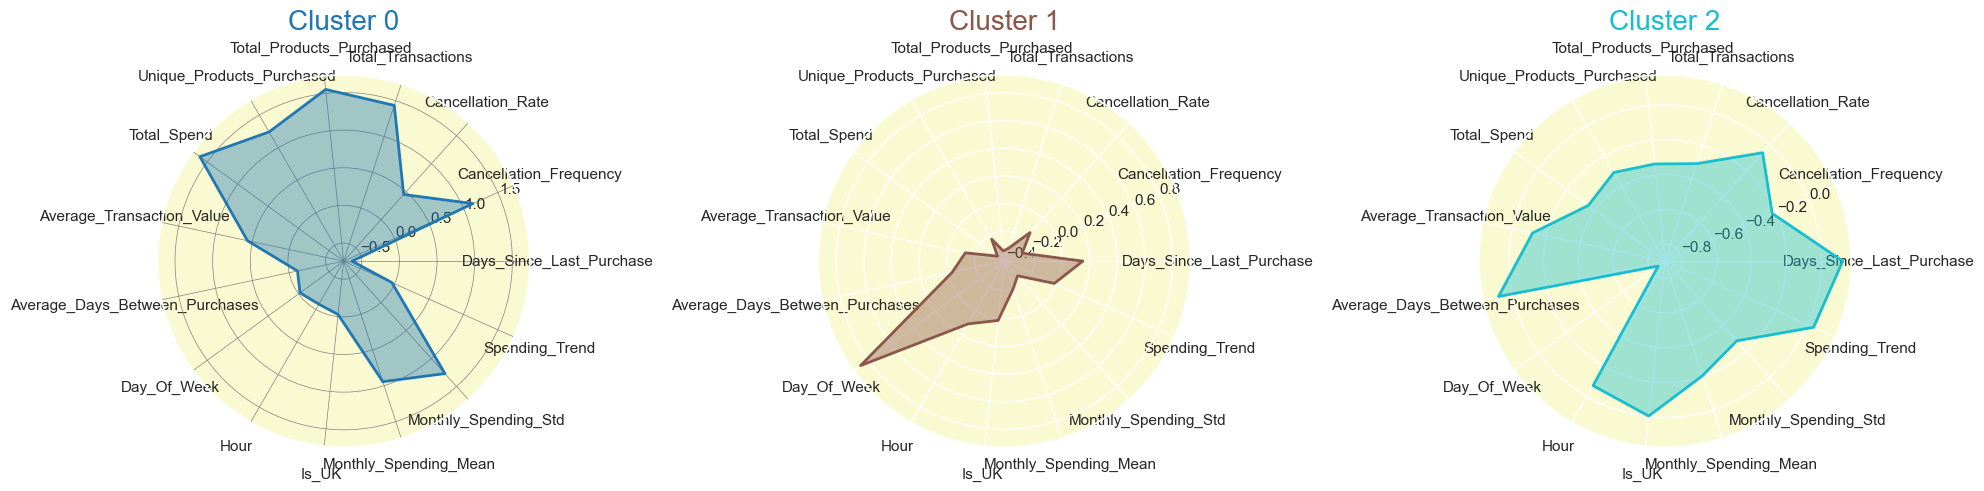

In [54]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

### Spending Patterns by Cluster

### Cluster 0:
- **High Total Spend, Transactions, and Average Transaction Value.**
- Frequent, high-value purchases.
- Represents **engaged and loyal high-value customers.**

### Cluster 1:
- **Low Total Spend, Transactions, and Negative Spending Trend.**
- Minimal engagement with declining activity.
- Represents **disengaged or churned customers.**

### Cluster 2:
- **Moderate Total Spend, Transactions, and Balanced Spending Trend.**
- Steady and regular engagement.
- Represents **average customers with moderate spending.**

### Summary:
- **Cluster 0**: Retain with loyalty rewards.
- **Cluster 1**: Re-engage with targeted offers.
- **Cluster 2**: Maintain with personalized promotions.
